### Importing all necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Loading data and checking it

In [2]:
data = pd.read_csv('star_class.csv')

In [3]:
print(data.columns)
data['Star color'] = pd.factorize(data['Star color'])[0]
data['Spectral class'] = pd.factorize(data['Spectral Class'])[0]

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


### Feature Analysis

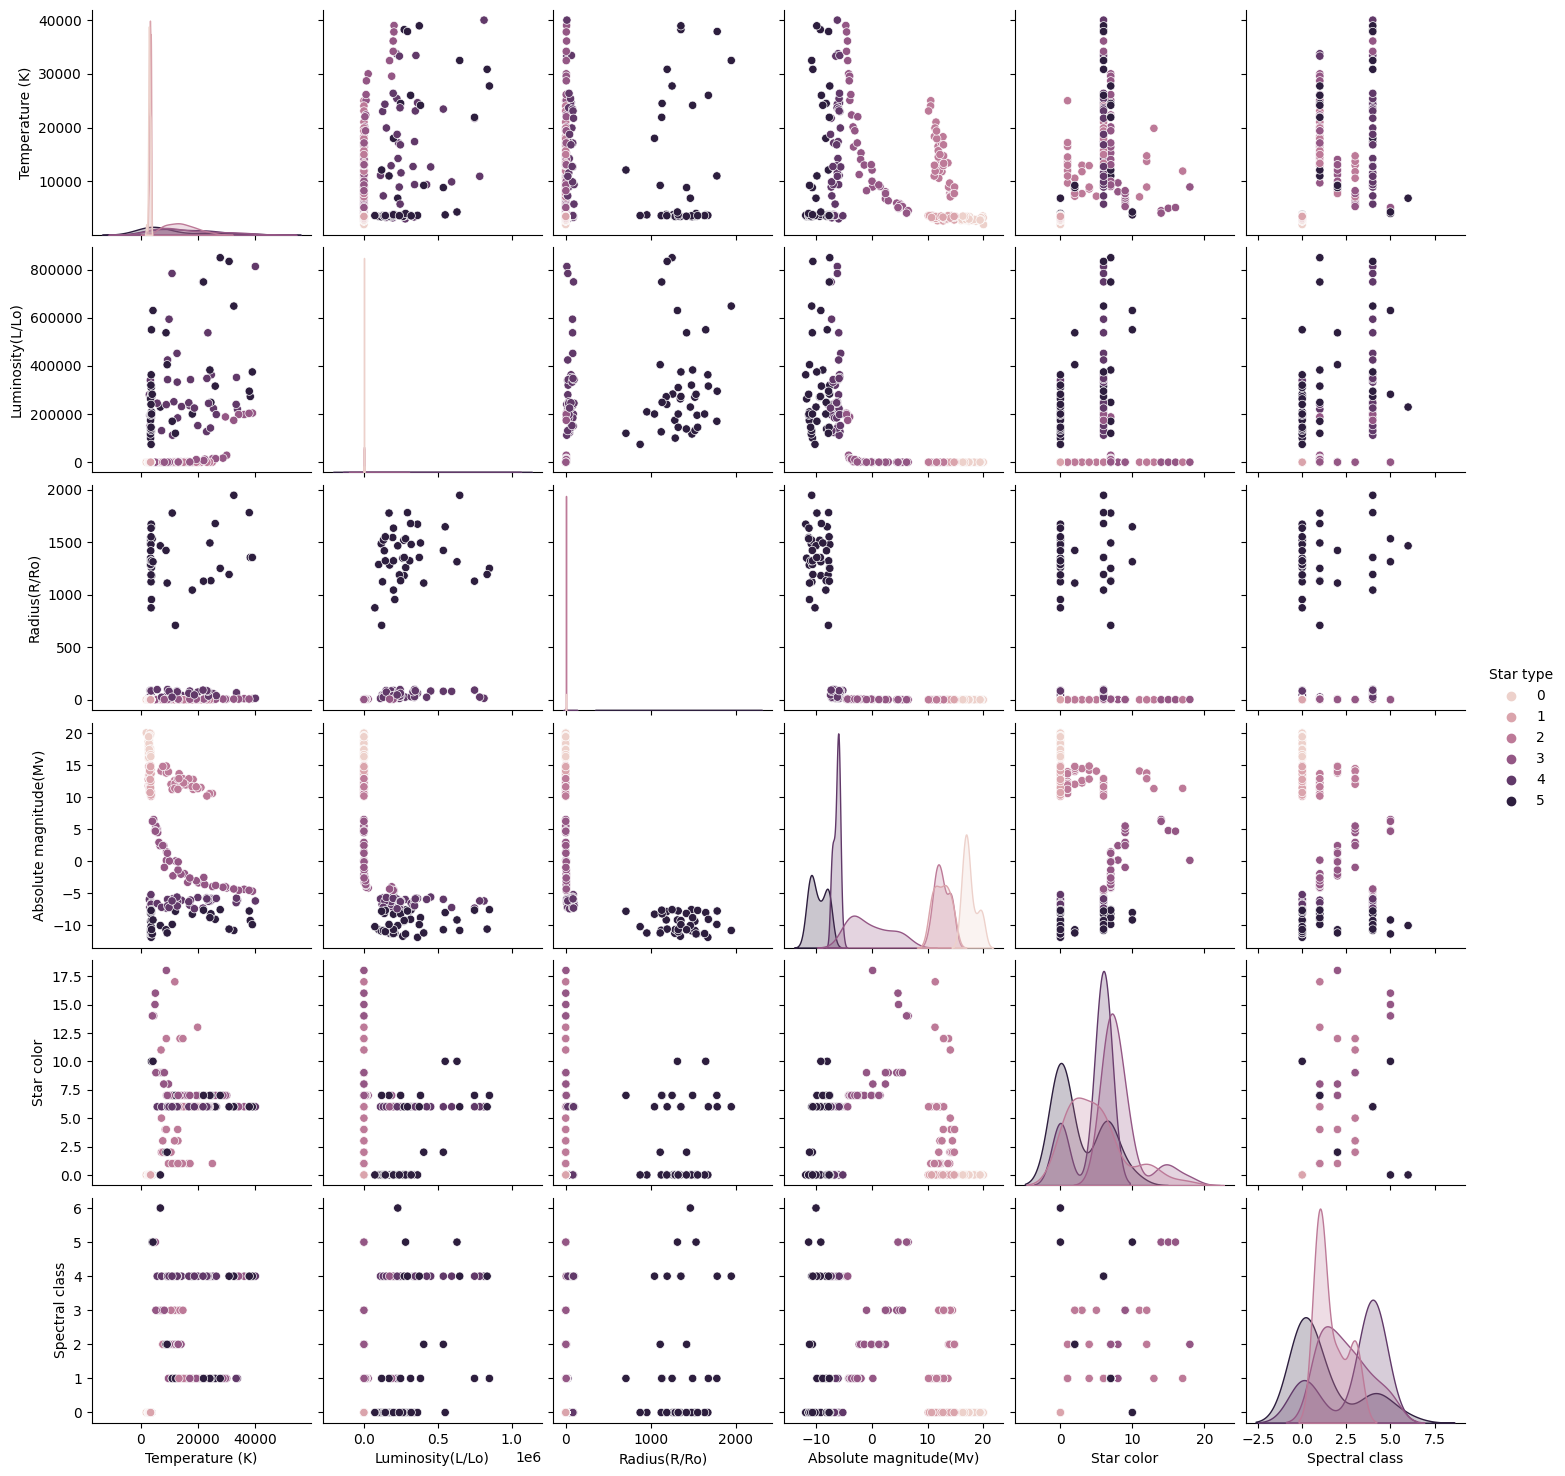

In [4]:
sns.pairplot(data, hue='Star type')
plt.show()

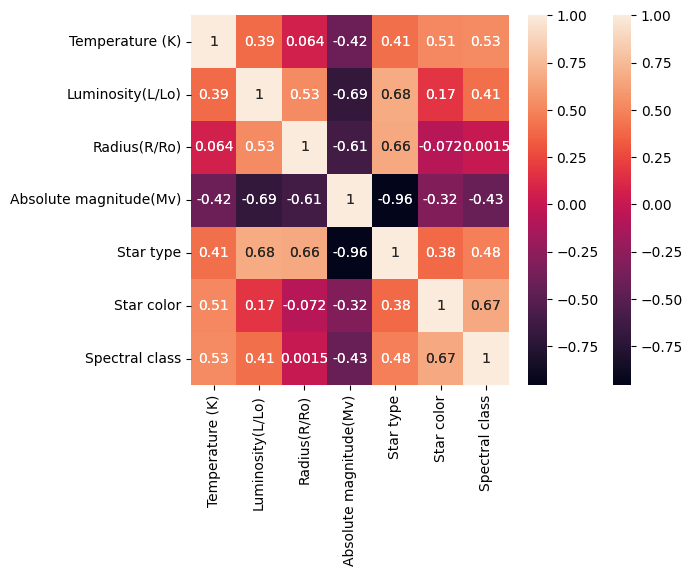

In [8]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [10]:
print(corr_matrix['Star type'])

Temperature (K)           0.411129
Luminosity(L/Lo)          0.676845
Radius(R/Ro)              0.660975
Absolute magnitude(Mv)   -0.955276
Star type                 1.000000
Star color                0.382211
Spectral class            0.477165
Name: Star type, dtype: float64


In [7]:
strong_data = ['Absolute magnitude(Mv)', 'Luminosity(L/Lo)']
X = data[strong_data]
y = data['Star type']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)

print("Acurracy Score: {0}".format(round(score, 3)))

Acurracy Score: 0.958
